In [1]:
# Parameters to set to run this notebook

# Initialize helpers.
import numpy as np
import project_path
from model.data_accessor import get_data_file_abs_path
from model.neuron_metadata import *
neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json(get_data_file_abs_path('chem.json'))
N = neuron_metadata_collection.get_size()

# How many seconds to run each step for. This should be long enough for stability to be observed.
step_duration_s = 2
# The step amplitudes in nA. Each amplitude will be run for step_duration
step_amplitudes_nA = [1,2,1]

# Initial condition
# If you want a fixed-seed initial condition, uncomment the line below.
# np.random.seed(0)
init_conds = 10**(-4)*np.random.normal(0, 0.94, 2*N)

In [2]:
# Not really parameters, but possible that these might get changed

# Neurons to plot membrane potentials for.
neurons_to_observe = NeuronMetadataCollection.create_lr_names_from_base([
  "AWA"
  ])


In [3]:
from model.neural_model import NeuralModel
from util.plot_util import *

model = NeuralModel(neuron_metadata_collection)
model.init_conds = init_conds

# Set I_inj_i(t)
awal_index = neuron_metadata_collection.get_id_from_name("AWAL")
awar_index = neuron_metadata_collection.get_id_from_name("AWAR")

def time_to_I_ext_fun(t):
  amp = step_amplitudes_nA[int(t / step_duration_s)]
  cur_I_ext = np.zeros(N)
  cur_I_ext[awal_index] = amp
  cur_I_ext[awar_index] = amp
  return cur_I_ext

# These are timesteps when I_ext changes
num_step_values = len(step_amplitudes_nA)
t_changes_I_ext = np.array(range(num_step_values)) * step_duration_s
t_changes_I_ext = t_changes_I_ext.tolist()
model.set_I_ext(time_to_I_ext_fun, t_changes_I_ext)

model.init_kunert_2017()

step_duration_timesteps = int(step_duration_s / model.dt)
simul_timesteps = step_duration_timesteps * len(step_amplitudes_nA)
(v_mat, s_mat, v_normalized_mat) = model.run(simul_timesteps)

# The oscillatory dynamic doesn't stabilize until about dt*300 onwards.
# Also, interactome analysis is done after the first 50 timesteps.
truncated_potentials = v_normalized_mat[:,:]

Timestep 0 out of 600
Timestep 100 out of 600
Timestep 200 out of 600
Timestep 300 out of 600
Timestep 400 out of 600
Timestep 500 out of 600
Total runtime = 1.67s


# Plot potentials of selected neurons

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


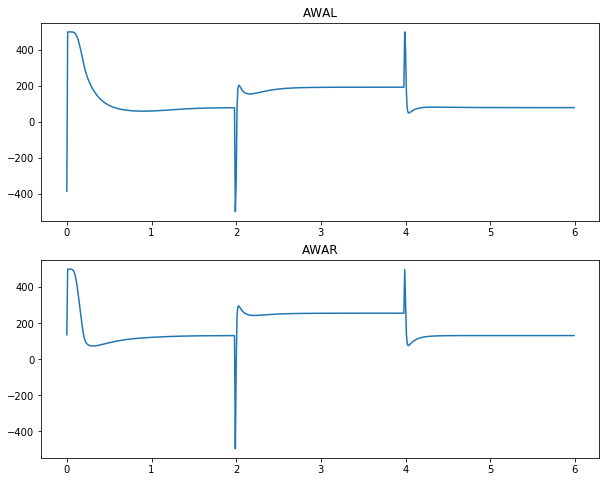

In [4]:
fig = plot_potentials(neurons_to_observe, truncated_potentials, model.dt, neuron_metadata_collection)
fig.show()

# Plot summarized dynamics per neuron class

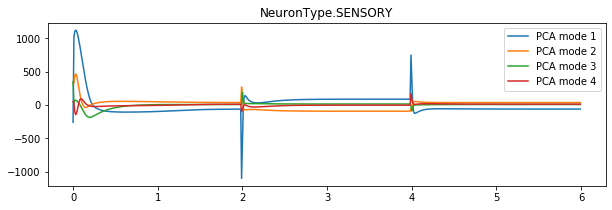

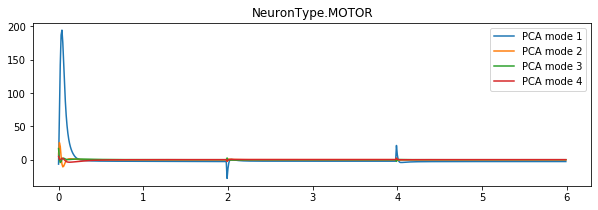

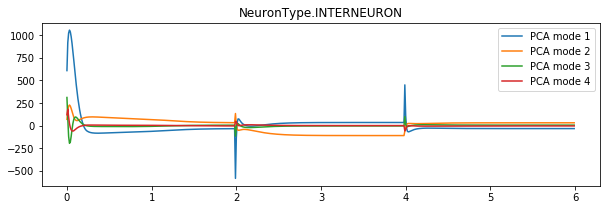

In [5]:
plot_pcas(truncated_potentials, model.dt, neuron_metadata_collection)